Problem statement : To predict the amount (regession problem) 
    
dependent var : amount

In [36]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
matplotlib.rcParams.update({'font.size':15})

## Load and review dataset

In [8]:
df = pd.read_csv("Datasets/TaxiFare.csv")

In [9]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [10]:
df['amount']

0          4.50
1         16.90
2          5.70
3          7.70
4          5.30
5         12.10
6          7.50
7         16.50
8          9.00
9          8.90
10         5.30
11         5.50
12         4.10
13         7.00
14         7.70
15         5.00
16        12.50
17         5.30
18         5.30
19         4.00
20        10.50
21        11.50
22         4.50
23         4.90
24         6.10
25         7.30
26         6.50
27         4.50
28         9.30
29         4.50
30         5.50
31        22.54
32        31.90
33         5.70
34        18.10
35        58.00
36         4.50
37         5.30
38         9.00
39         9.80
40         8.10
41        10.90
42        17.50
43        12.10
44         5.30
45         6.90
46         4.50
47         3.30
48         3.30
49         9.00
50         9.70
51         5.50
52         8.00
53         7.50
54        25.50
55        15.30
56        34.67
57         9.70
58        13.70
59         6.50
60         5.00
61         4.50
62      

In [11]:
df.shape

(50000, 8)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [13]:
df.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49063,08:53.0,10.5,2012-01-27 20:08:53 UTC,-73.981028,40.675760,-73.954852,40.692955,1
1567,55:00.0,8.0,2014-08-26 07:55:00 UTC,-73.995300,40.745200,-73.977610,40.755590,1
20245,02:00.0,6.1,2009-02-11 19:02:00 UTC,-73.982930,40.771235,-73.980053,40.789777,1
3426,52:37.0,6.5,2009-03-12 09:52:37 UTC,-73.979691,40.749336,-73.994265,40.729236,1
41220,31:58.0,28.0,2014-08-09 00:31:58 UTC,-73.985504,40.747144,-73.854418,40.727473,1
33915,14:00.0,7.0,2014-04-05 12:14:00 UTC,-73.993812,40.731212,-73.982403,40.739922,1
17309,51:00.0,5.5,2012-12-30 07:51:00 UTC,-73.972680,40.756252,-73.982593,40.735832,1
21912,17:00.0,12.5,2011-01-29 02:17:00 UTC,-73.989305,40.729937,-73.991957,40.770703,2
45153,52:00.0,5.5,2014-09-17 15:52:00 UTC,-73.972292,40.758097,-73.965485,40.769410,1
2946,56:11.0,12.5,2011-09-09 08:56:11 UTC,-73.966023,40.763697,-73.961234,40.806531,1


In [14]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [15]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

<Axes: xlabel='no_of_passenger', ylabel='count'>

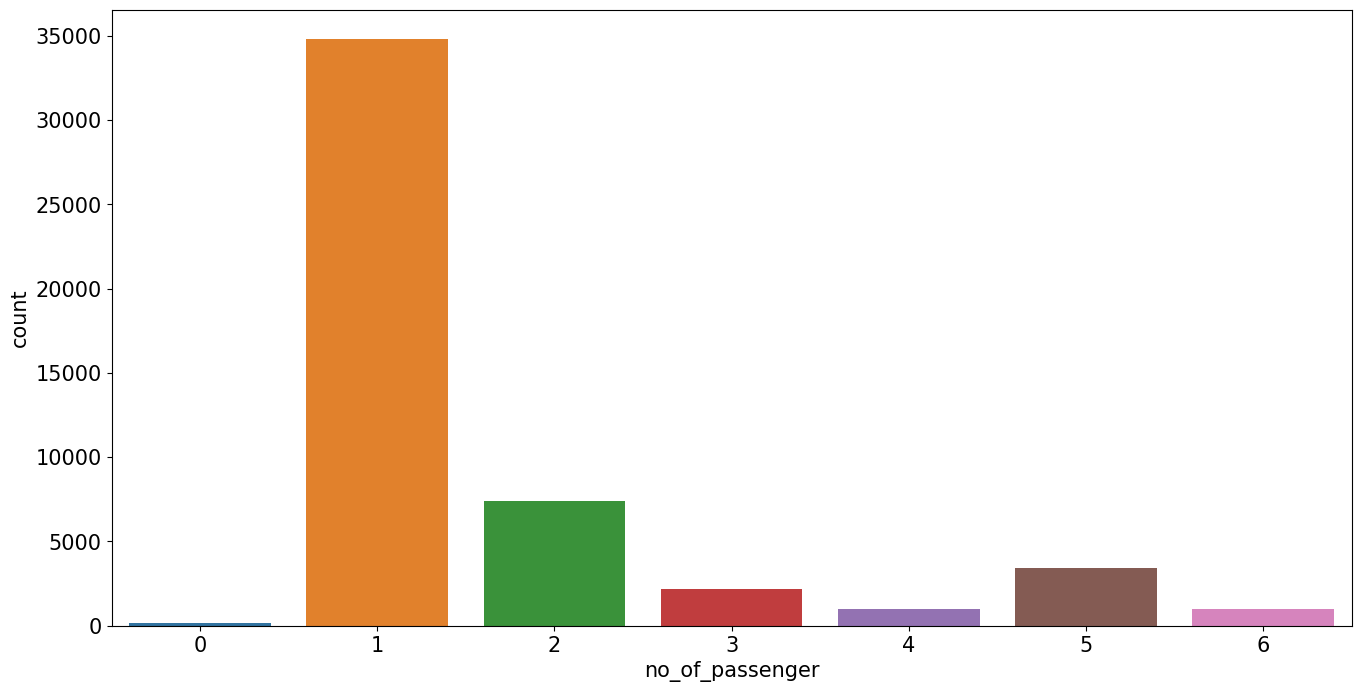

In [16]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['no_of_passenger'])

Most of the rows in the dataset have a passenger count is 1. Remove all rows with multiple passerngers and remove the "Key" column from the dataset

In [17]:
### Dealing with duplicate values
df = df[df['no_of_passenger'] == 1]
df = df.drop(['unique_id', 'no_of_passenger'],axis=1)
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233


In [18]:
df.shape

(34808, 6)

In [19]:
### Seperate the categorical and continuous columns
cat = list(df.columns[df.dtypes=='object'])
cat

['date_time_of_pickup']

In [20]:
con = list(df.columns[df.dtypes!='object'])
con

['amount',
 'longitude_of_pickup',
 'latitude_of_pickup',
 'longitude_of_dropoff',
 'latitude_of_dropoff']

In [21]:
### Find the correletion between the influence input variable such as latitude and longitude
corr_matrix = df[con].corr()
corr_matrix['amount'].sort_values(ascending=False)

amount                  1.000000
longitude_of_dropoff    0.005171
longitude_of_pickup     0.004961
latitude_of_dropoff    -0.005030
latitude_of_pickup     -0.005709
Name: amount, dtype: float64

In [22]:
import datetime
from math import sqrt

for i, row in df.iterrows():
    dt = datetime.datetime.strptime(row['date_time_of_pickup'], '%Y-%m-%d %H:%M:%S UTC')
    df.at[i, 'day_of_week'] = dt.weekday()
    df.at[i, 'pickup_time'] = dt.hour
    x = (row['longitude_of_dropoff'] - row['longitude_of_pickup']) * 54.6 # 1 degree == 54.6 miles
    y = (row['latitude_of_dropoff'] - row['latitude_of_pickup']) * 69.0   # 1 degree == 69 miles
    distance = sqrt(x**2 + y**2)
    df.at[i, 'distance'] = distance

df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,day_of_week,pickup_time,distance
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,0.0,17.0,0.641024
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,16.0,5.275538
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,5.0,4.0,1.738444
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,7.0,1.253707
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,3.0,9.0,2.391384


<Axes: >

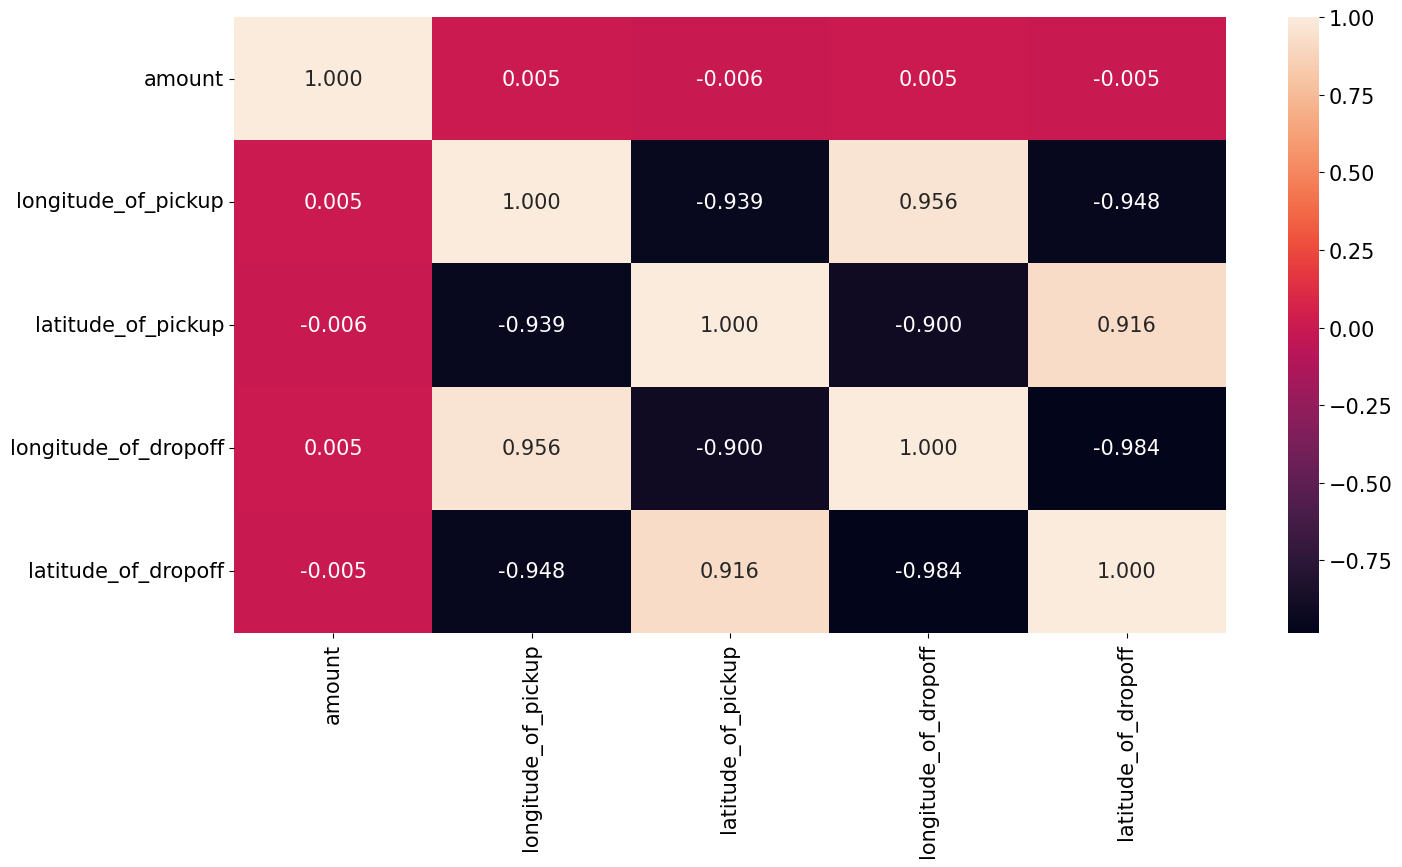

In [26]:
plt.figure(figsize=(16,8))
sns.heatmap(df[con].corr(),annot=True, fmt='.3f')

### Remove columns that has no longer needed

In [27]:
df.drop(columns=['date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff'], inplace=True)
df.head()

,amount,day_of_week,pickup_time,distance
0,4.5,0.0,17.0,0.641024
1,16.9,1.0,16.0,5.275538
3,7.7,5.0,4.0,1.738444
4,5.3,1.0,7.0,1.253707
5,12.1,3.0,9.0,2.391384


In [30]:
### After removing unusefull columns again check correlation matrix
corr_matrix = df.corr()
corr_matrix["amount"].sort_values(ascending=False)

amount         1.000000
distance       0.014725
day_of_week    0.010151
pickup_time   -0.015876
Name: amount, dtype: float64

There still isn't a strong correlation between diatance traveled and fare amount . 

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,34808.0,11.210226,9.527580,-5.0,6.000000,8.500000,12.500000,200.000000
day_of_week,34808.0,2.947713,1.942392,0.0,1.000000,3.000000,5.000000,6.000000
pickup_time,34808.0,13.382757,6.401627,0.0,9.000000,14.000000,19.000000,23.000000
distance,34808.0,11.850895,246.753948,0.0,0.771727,1.322725,2.414889,24861.003946


The dataset contains outliers, and outliers frequently skew the results of machine-learning models (or prevent them from working at all). Filter the dataset by eliminating negative fare amounts and placing reasonable limits on fares and distance.

In [33]:
df = df[(df['distance'] > 1.0) & (df['distance'] < 10.0)]
df = df[(df['amount'] > 0.0) & (df['amount'] < 50.0)]
df.shape

(21318, 4)

In [34]:
corr_matrix = df.corr()
corr_matrix["amount"].sort_values(ascending=False)

amount         1.000000
distance       0.848715
day_of_week    0.002447
pickup_time   -0.018968
Name: amount, dtype: float64

In [37]:
x = df.drop(['amount'], axis=1)
y = df['amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Train Linear- Regression model

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [41]:
model.score(x_train, y_train)

0.7189726461612352

In [40]:
model.score(x_test, y_test)

0.7294968092631228

### Use the model to predict amount of taxiride

In [44]:
model.predict([[4,17,2.0]])

array([10.75332572])

In [45]:
model.predict([[5,17,2.0]])

array([10.71429623])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)
model.fit(x_train, y_train)
cross_val_score(model, x, y, cv=5).mean()

array([16.612])